# Visual-based road detection

* [Work Description](files/intro-docs/VCOM_2015-2016_Trabalho_1_v02.pdf)

This project focus on finding and extracting delimiter features (edges) present on a road. This ability is of great importance in computer vision field, namely in autonomous driver applications.

## Process
* Sharpen image
    * **e.g.** CLAHE
* Reduce noise (assume Gaussian noise)
    * Preserve the edges
* Highlight edges
    * **e.g.** Canny
* Extract lines
* Find Intersection point


### Possible improvements
* Add Gaussian noise and test performance of the algorithm

*Note:* test with different image representations, in order to extract channels where the image is easier to parse.

In [1]:
import cv2

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

# Load Images Dataset

In [2]:
img = cv2.imread("pics/Road.jpg")
img = cv2.resize(img, (600, 400))

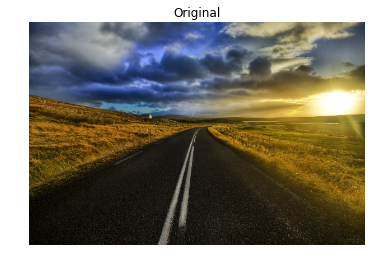

In [3]:
img_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off'); plt.title('Original'); plt.imshow(img_show)

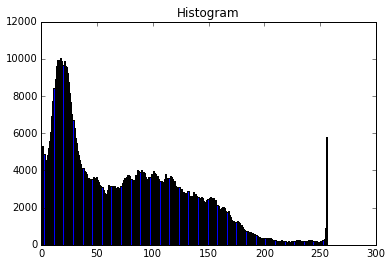

In [4]:
plt.title('Histogram'); _ = plt.hist(img_show.ravel(), 256, [0, 256])

# Image Contrast Enhancement

convert to HLS, in order to extract Intensity (in this case Lightness)

In [5]:
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

## Histogram Equalization

In [6]:
img_he = img_hls.copy()
img_he[:, :, 1] = cv2.equalizeHist(img_he[:, :, 1])

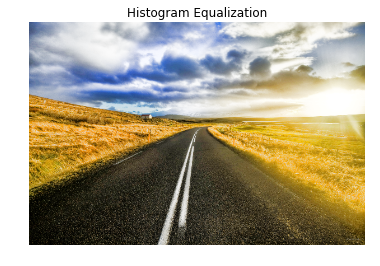

In [7]:
img_show = cv2.cvtColor(img_he, cv2.COLOR_HLS2RGB)
plt.axis('off'); plt.title('Histogram Equalization'); plt.imshow(img_show)

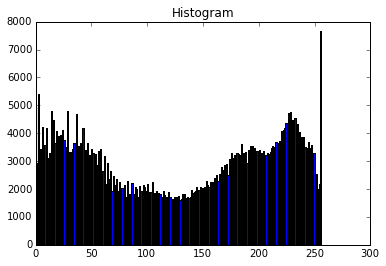

In [8]:
plt.title('Histogram'); _ = plt.hist(img_show.ravel(), 256, [0, 256])

## CLAHE

In [9]:
img_clahe = img_hls.copy()
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10, 10))
img_clahe[:, :, 1] = clahe.apply(img_clahe[:, :, 1])

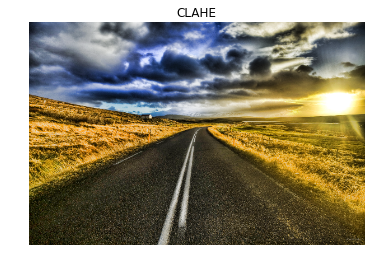

In [10]:
img_show = cv2.cvtColor(img_clahe, cv2.COLOR_HLS2RGB)
plt.axis('off'); plt.title('CLAHE'); plt.imshow(img_show)

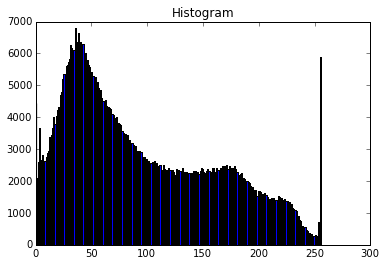

In [11]:
plt.title('Histogram'); _ = plt.hist(img_show.ravel(), 256, [0, 256])

We'll use CLAHE output, cause the histogram obtained is not so sensible to high lightning.

In [12]:
img_sharp = img_clahe
img_sharp = cv2.cvtColor(img_sharp, cv2.COLOR_HLS2BGR)

# Noise Reduction

We use Bilateral Filtering for noise reduction. This way, the textures are removed, but the edges are kept intact.

In [13]:
img_bil = cv2.bilateralFilter(img_sharp, 10, 75, 500)

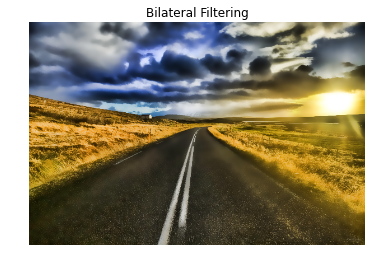

In [14]:
img_show = cv2.cvtColor(img_bil, cv2.COLOR_BGR2RGB)
plt.axis('off'); plt.title('Bilateral Filtering'); plt.imshow(img_show)

In [15]:
original_img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
sharp_img_hls = cv2.cvtColor(img_sharp, cv2.COLOR_BGR2HLS)
denoise_img_hls = cv2.cvtColor(img_bil, cv2.COLOR_BGR2HLS)

original_img_hls = cv2.Canny(original_img_hls[:, :, 1], 75, 300)
sharp_img_hls = cv2.Canny(sharp_img_hls[:, :, 1], 75, 300)
denoise_img_hls = cv2.Canny(denoise_img_hls[:, :, 1], 75, 300)

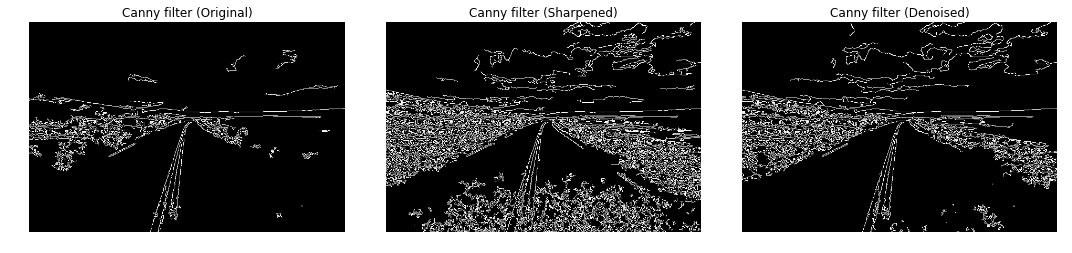

In [16]:
plt.figure(figsize=(15, 10))
plt.subplot(131); plt.axis('off'); plt.title("Canny filter (Original)"); plt.imshow(original_img_hls, cmap='gray')
plt.subplot(132); plt.axis('off'); plt.title("Canny filter (Sharpened)"); plt.imshow(sharp_img_hls, cmap='gray')
plt.subplot(133); plt.axis('off'); plt.title("Canny filter (Denoised)"); plt.imshow(denoise_img_hls, cmap='gray')
plt.tight_layout()

## Gaussian blur variant

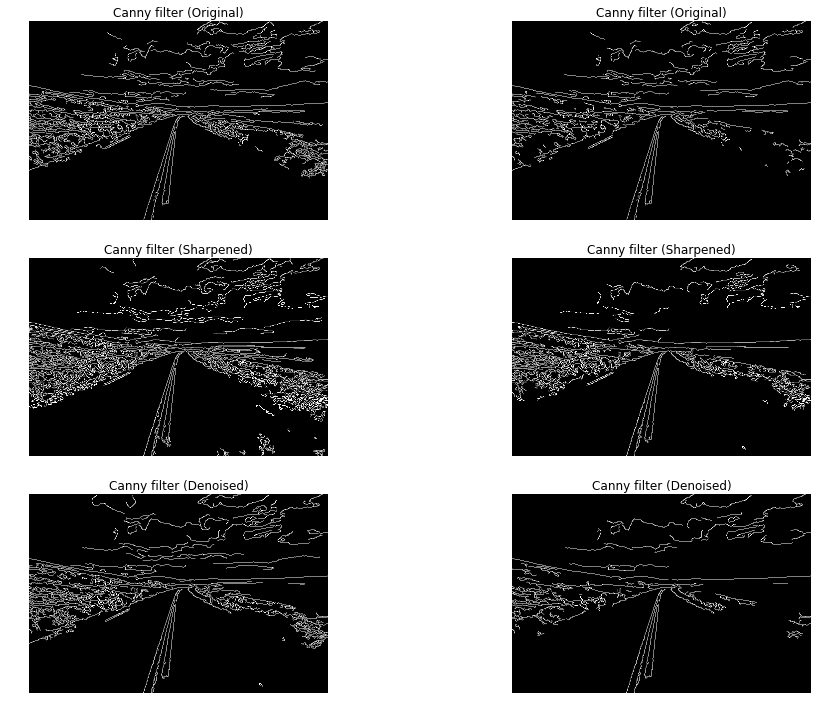

In [17]:
original_img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
sharp_img_hls = cv2.cvtColor(img_sharp, cv2.COLOR_BGR2HLS)
denoise_img_hls = cv2.cvtColor(img_bil, cv2.COLOR_BGR2HLS)

original_img_hls = cv2.GaussianBlur(original_img_hls, (5,5), 0)
sharp_img_hls = cv2.GaussianBlur(sharp_img_hls, (3,3), 0)
denoise_img_hls = cv2.GaussianBlur(denoise_img_hls, (3,3), 0)

original_img_hls0 = cv2.Canny(original_img_hls[:, :, 1], 25, 110)
original_img_hls1 = cv2.Canny(original_img_hls[:, :, 1], 50, 110)
sharp_img_hls0 = cv2.Canny(sharp_img_hls[:, :, 1], 75, 225)
sharp_img_hls1 = cv2.Canny(sharp_img_hls[:, :, 1], 100, 300)
denoise_img_hls0 = cv2.Canny(denoise_img_hls[:, :, 1], 75, 225)
denoise_img_hls1 = cv2.Canny(denoise_img_hls[:, :, 1], 100, 300)

plt.figure(figsize=(15, 10))
plt.subplot(321); plt.axis('off'); plt.title("Canny filter (Original)"); plt.imshow(original_img_hls0, cmap='gray')
plt.subplot(322); plt.axis('off'); plt.title("Canny filter (Original)"); plt.imshow(original_img_hls1, cmap='gray')
plt.subplot(323); plt.axis('off'); plt.title("Canny filter (Sharpened)"); plt.imshow(sharp_img_hls0, cmap='gray')
plt.subplot(324); plt.axis('off'); plt.title("Canny filter (Sharpened)"); plt.imshow(sharp_img_hls1, cmap='gray')
plt.subplot(325); plt.axis('off'); plt.title("Canny filter (Denoised)"); plt.imshow(denoise_img_hls0, cmap='gray')
plt.subplot(326); plt.axis('off'); plt.title("Canny filter (Denoised)"); plt.imshow(denoise_img_hls1, cmap='gray')
plt.tight_layout()

# Contours

## Contours without gaussian blur

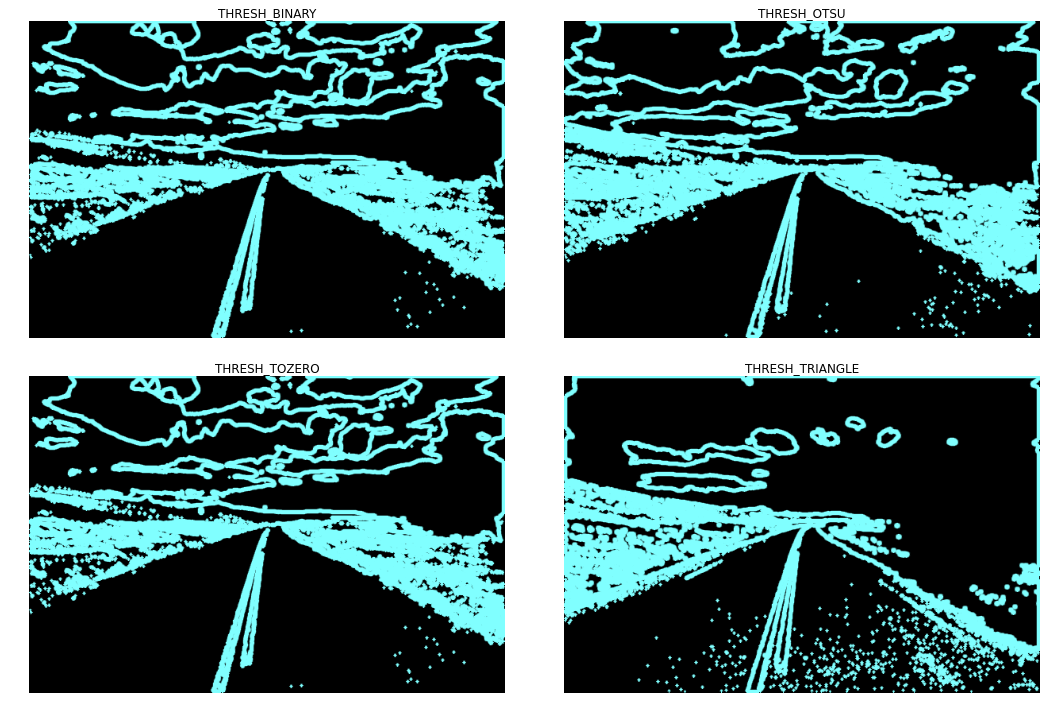

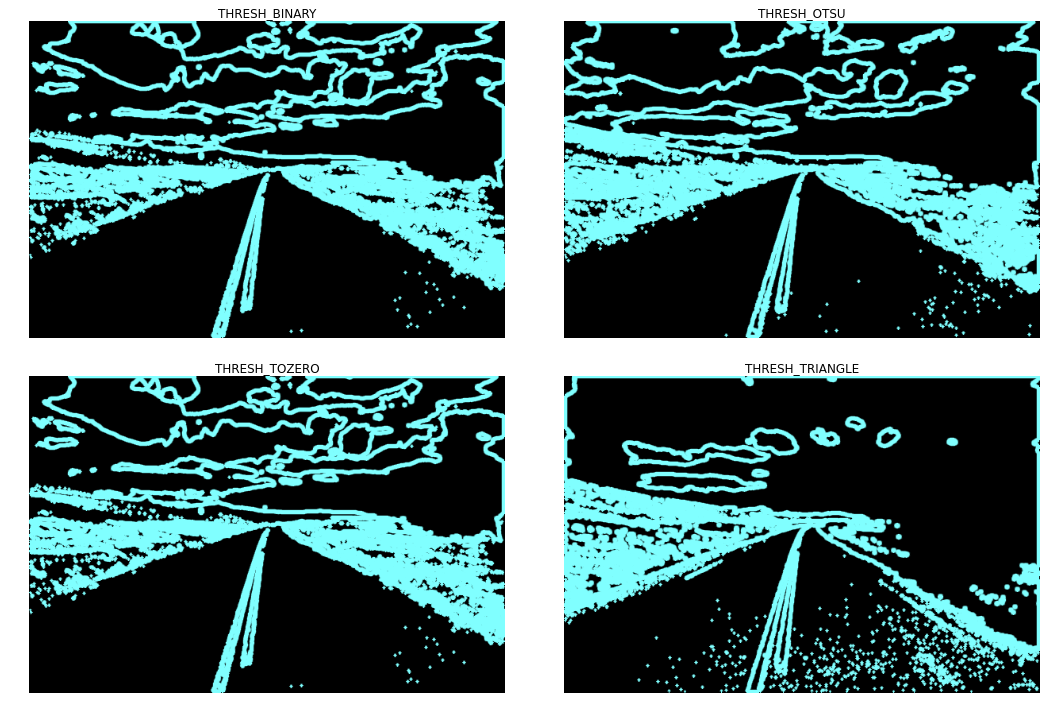

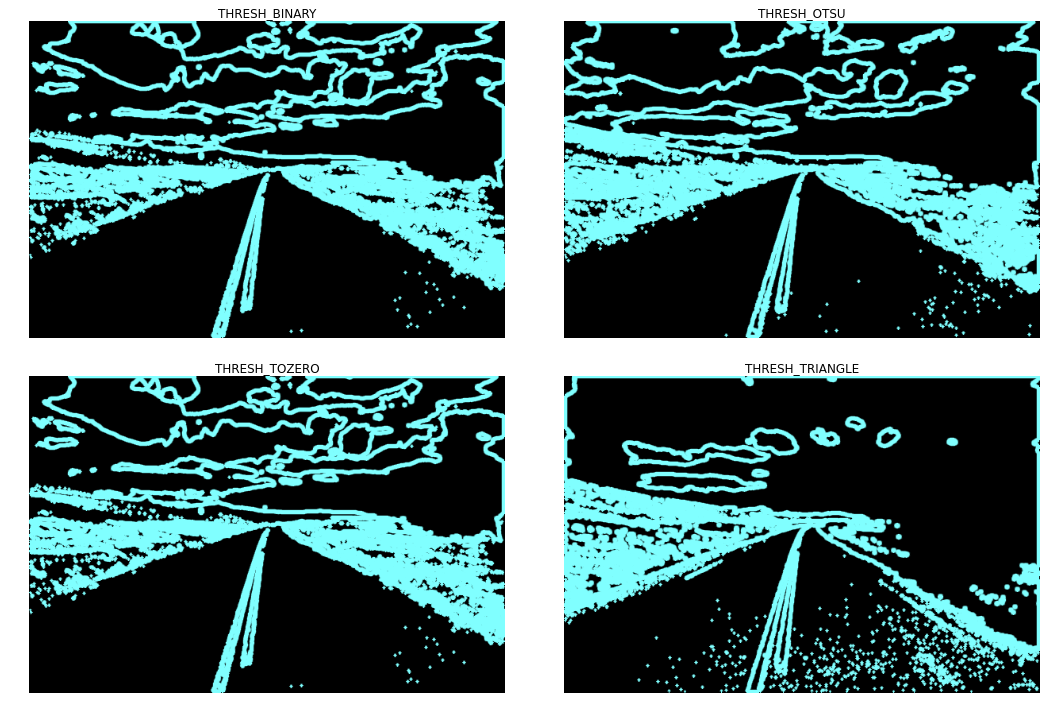

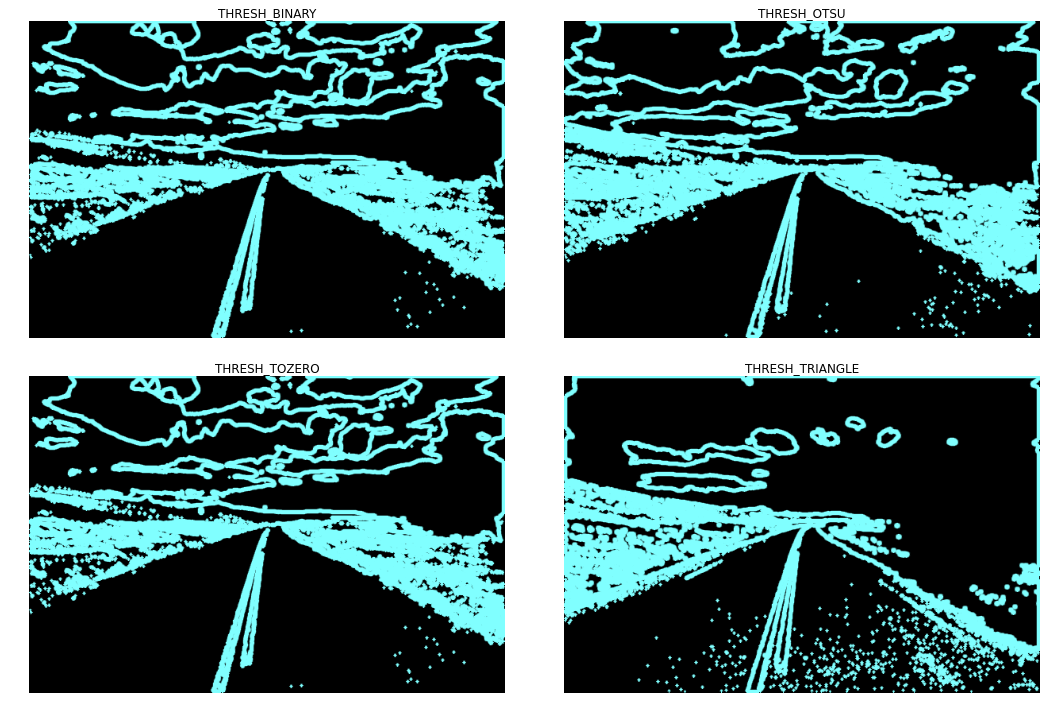

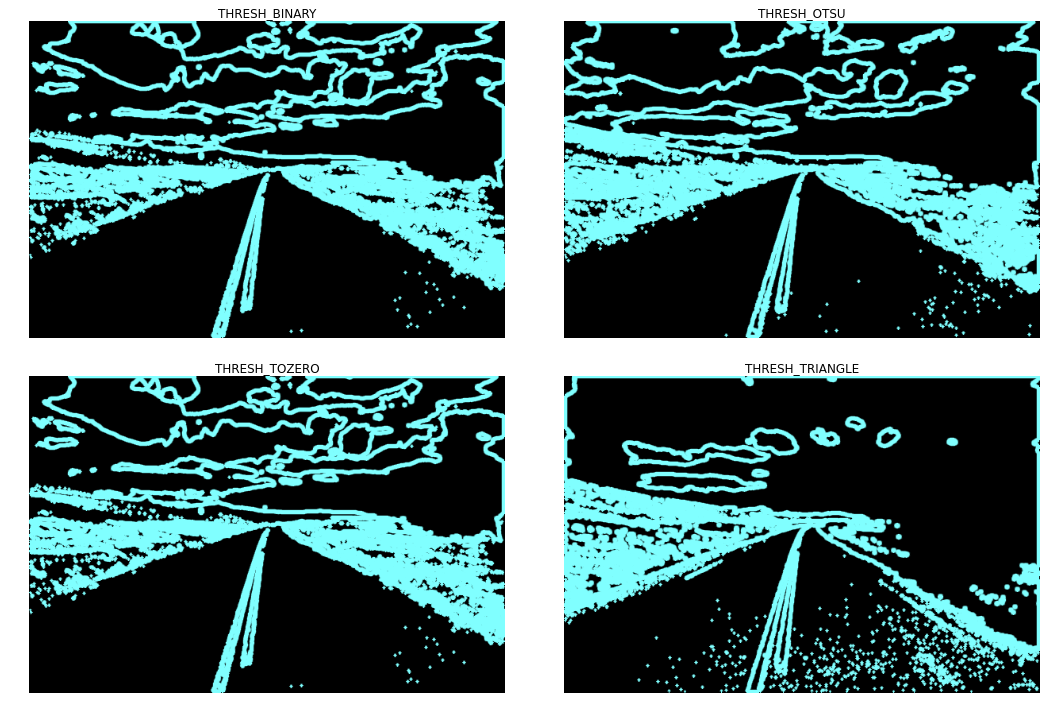

In [18]:
h, w, channels = img.shape

img_copy = img.copy()
ret, threshold_type0 = cv2.threshold(cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY), 100, 255, cv2.THRESH_BINARY)
img_copy = img.copy()
ret, threshold_type1 = cv2.threshold(cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY), 100, 255, cv2.THRESH_OTSU)
img_copy = img.copy()
ret, threshold_type2 = cv2.threshold(cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY), 100, 255, cv2.THRESH_TOZERO)
img_copy = img.copy()
ret, threshold_type3 = cv2.threshold(cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY), 100, 255, cv2.THRESH_TRIANGLE)

_, contours0, hierarchy0 = cv2.findContours(threshold_type0, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
_, contours1, hierarchy1 = cv2.findContours(threshold_type1, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
_, contours2, hierarchy2 = cv2.findContours(threshold_type2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
_, contours3, hierarchy3 = cv2.findContours(threshold_type3, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for levels in range(1, 10, 2):
    img0 = np.zeros((h, w, 3), np.uint8)
    cv2.drawContours( img0, contours0, (-1, 3)[levels <= 0], (128, 255, 255), 3, cv2.LINE_AA, hierarchy0, abs(levels))

    img1 = np.zeros((h, w, 3), np.uint8)
    cv2.drawContours( img1, contours1, (-1, 3)[levels <= 0], (128, 255, 255), 3, cv2.LINE_AA, hierarchy1, abs(levels))

    img2 = np.zeros((h, w, 3), np.uint8)
    cv2.drawContours( img2, contours2, (-1, 3)[levels <= 0], (128, 255, 255), 3, cv2.LINE_AA, hierarchy2, abs(levels))

    img3 = np.zeros((h, w, 3), np.uint8)
    cv2.drawContours( img3, contours3, (-1, 3)[levels <= 0], (128, 255, 255), 3, cv2.LINE_AA, hierarchy3, abs(levels))

    plt.figure(figsize=(15, 10))
    plt.subplot(221); plt.axis('off'); plt.title("THRESH_BINARY"); plt.imshow(img0)
    plt.subplot(222); plt.axis('off'); plt.title("THRESH_OTSU"); plt.imshow(img1)
    plt.subplot(223); plt.axis('off'); plt.title("THRESH_TOZERO"); plt.imshow(img2)
    plt.subplot(224); plt.axis('off'); plt.title("THRESH_TRIANGLE"); plt.imshow(img3)
    plt.tight_layout()


## Contours with gaussian blur

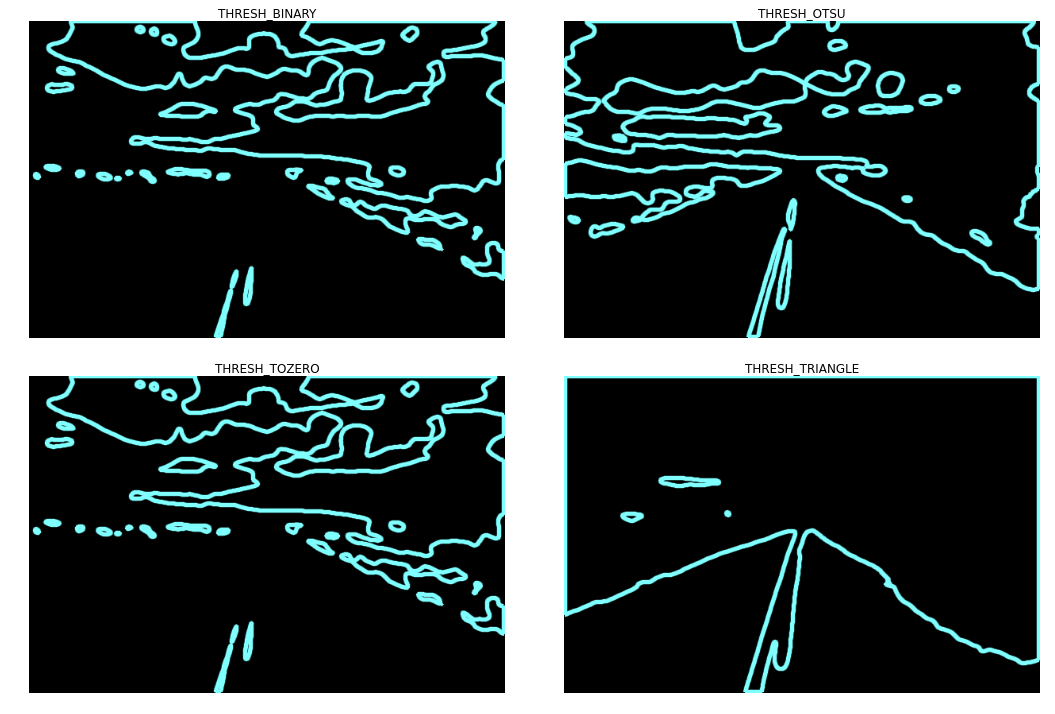

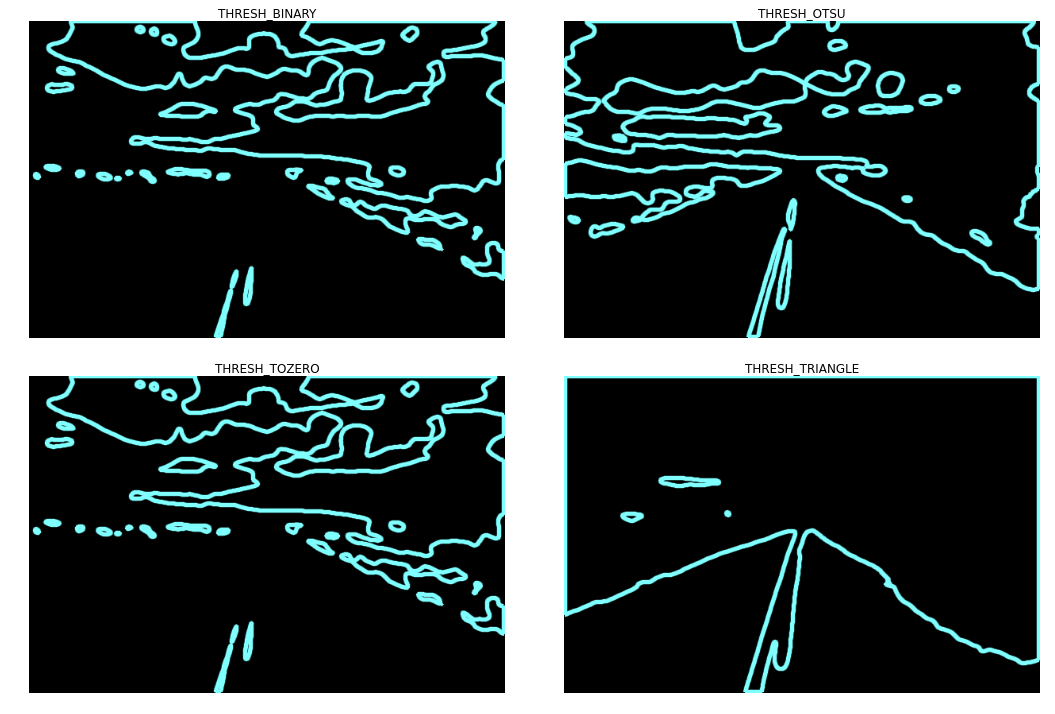

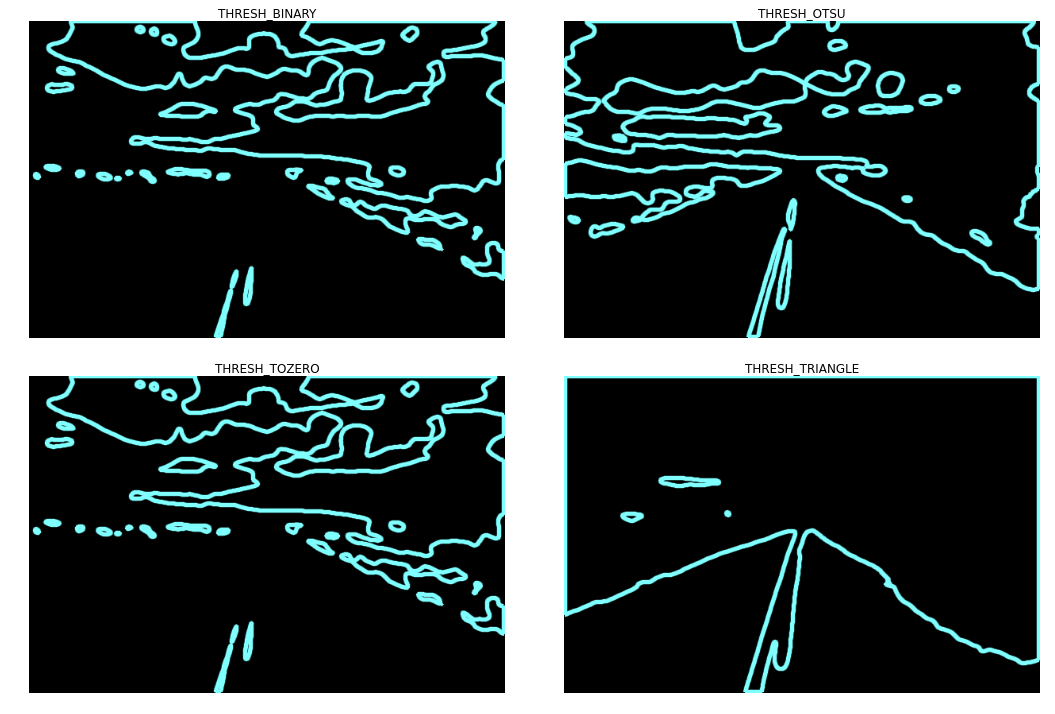

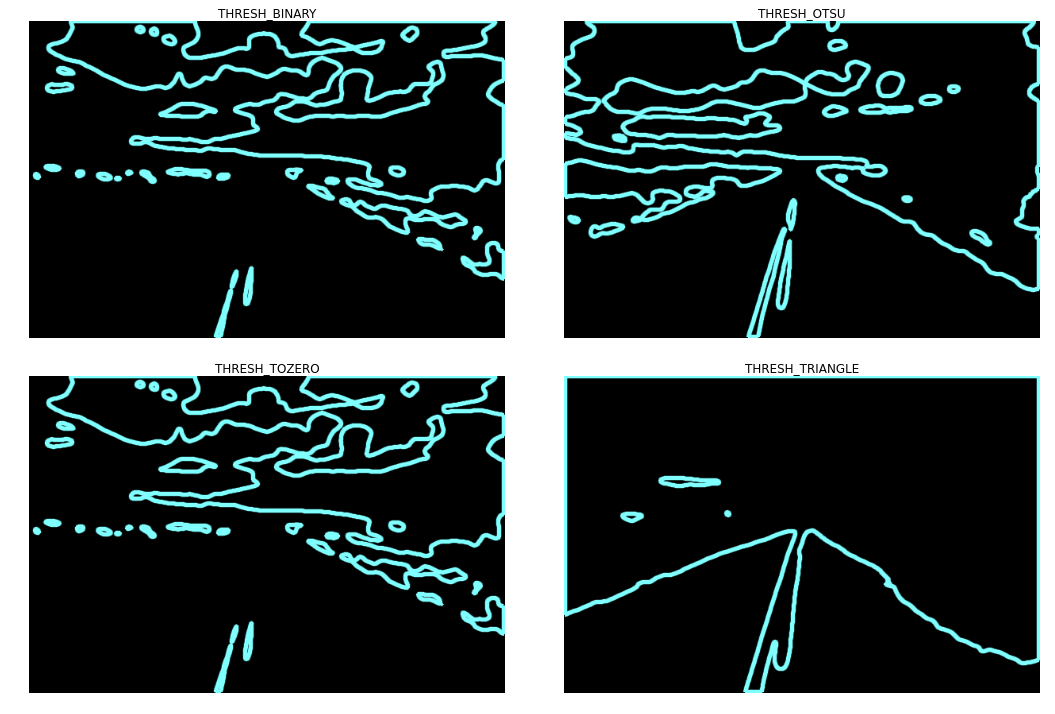

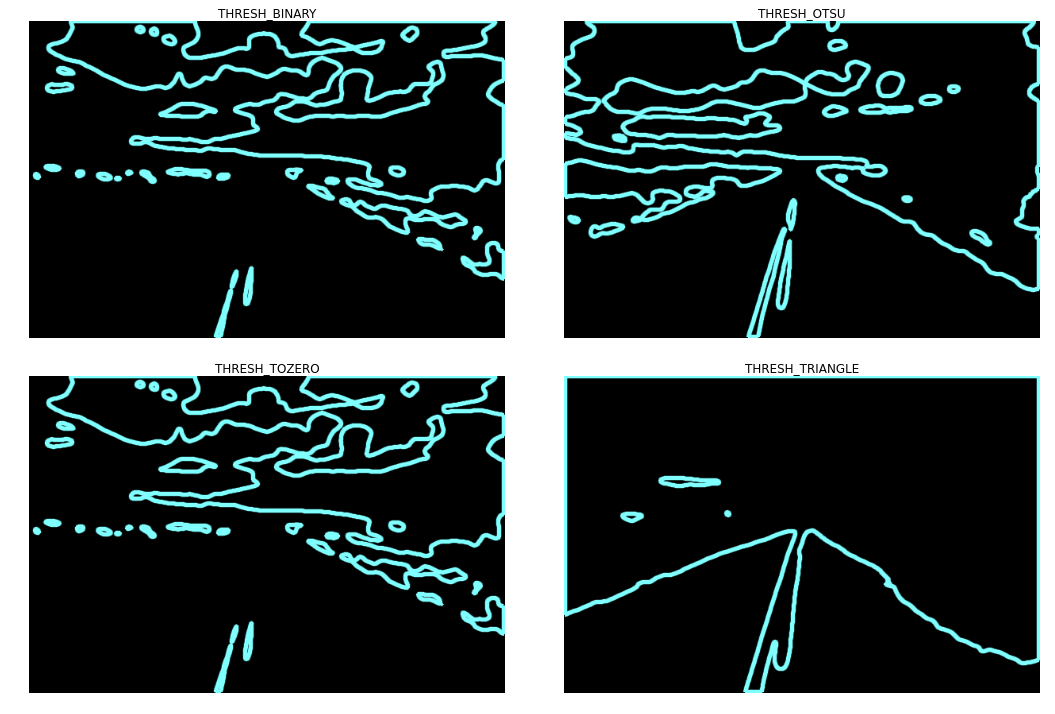

In [22]:
h, w, channels = img.shape

img_gauss = cv2.GaussianBlur(img, (25,25),0) # cv2.medianBlur(img, 31)

img_copy = img_gauss.copy()
ret, threshold_type0 = cv2.threshold(cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY), 100, 255, cv2.THRESH_BINARY)
img_copy = img_gauss.copy()
ret, threshold_type1 = cv2.threshold(cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY), 100, 255, cv2.THRESH_OTSU)
img_copy = img_gauss.copy()
ret, threshold_type2 = cv2.threshold(cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY), 100, 255, cv2.THRESH_TOZERO)
img_copy = img_gauss.copy()
ret, threshold_type3 = cv2.threshold(cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY), 100, 255, cv2.THRESH_TRIANGLE)

_, contours0, hierarchy0 = cv2.findContours(threshold_type0, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
_, contours1, hierarchy1 = cv2.findContours(threshold_type1, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
_, contours2, hierarchy2 = cv2.findContours(threshold_type2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
_, contours3, hierarchy3 = cv2.findContours(threshold_type3, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for levels in range(1, 10, 2):
    img0 = np.zeros((h, w, 3), np.uint8)
    cv2.drawContours( img0, contours0, (-1, 3)[levels <= 0], (128, 255, 255), 3, cv2.LINE_AA, hierarchy0, abs(levels))

    img1 = np.zeros((h, w, 3), np.uint8)
    cv2.drawContours( img1, contours1, (-1, 3)[levels <= 0], (128, 255, 255), 3, cv2.LINE_AA, hierarchy1, abs(levels))

    img2 = np.zeros((h, w, 3), np.uint8)
    cv2.drawContours( img2, contours2, (-1, 3)[levels <= 0], (128, 255, 255), 3, cv2.LINE_AA, hierarchy2, abs(levels))

    img3 = np.zeros((h, w, 3), np.uint8)
    cv2.drawContours( img3, contours3, (-1, 3)[levels <= 0], (128, 255, 255), 3, cv2.LINE_AA, hierarchy3, abs(levels))

    plt.figure(figsize=(15, 10))
    plt.subplot(221); plt.axis('off'); plt.title("THRESH_BINARY"); plt.imshow(img0)
    plt.subplot(222); plt.axis('off'); plt.title("THRESH_OTSU"); plt.imshow(img1)
    plt.subplot(223); plt.axis('off'); plt.title("THRESH_TOZERO"); plt.imshow(img2)
    plt.subplot(224); plt.axis('off'); plt.title("THRESH_TRIANGLE"); plt.imshow(img3)
    plt.tight_layout()
